## Oryginalna wizualizacja

![](poprawiany_wykres.png)
[Link do źródła wizualizacji](https://tvn24.pl/polska/koronawirus-w-polsce-mapa-zakazen-dzisiaj-2-grudnia-2020-4344739)

## Poprawiona wizualizacja

In [11]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

In [98]:
#przygotowanie danych
fp = 'mapa_pliki/wojewodztwa.shp'
map_df = gpd.read_file(fp)
nazwy = ["Śląskie", "Opolskie", "Wielkopolskie", "Zachodniopomorskie", "Świętokrzyskie","Kujawsko-Pomorskie", "Podlaskie","Dolnośląskie", "Podkarpackie","Małopolskie", "Pomorskie", "Warmińsko-Mazurskie", "Łódzkie", "Mazowieckie", "Lubelskie", "Lubuskie" ]
colors = ["white","black","black","black", "black", "black", "black", "black", "black", "black", "black", "black", "black", "white",  "black", "black"]

map_df["JPT_NAZWA_"] = nazwy
map_df["colors"] = colors
data = pd.read_excel("data.xlsx")
merged = map_df.set_index("JPT_NAZWA_").join(data.set_index("Wojewodztwo"))

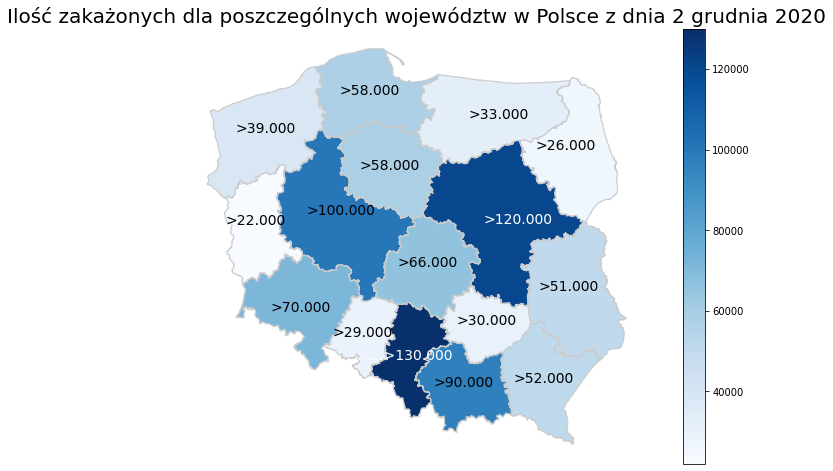

In [101]:
#pierwsza mapka

#rysowanie mapy
variable = "Wszystkie zakażenia"
vmin, vmax = 22000, 130000 #to robi skale
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

fig, ax = plt.subplots(1, figsize=(13, 8))
merged.plot(column=variable, cmap="Blues", linewidth=1.2, ax=ax, edgecolor="0.8")
ax.axis("off")
ax.set_title("Ilość zakażonych dla poszczególnych województw w Polsce z dnia 2 grudnia 2020", fontdict={"fontsize": "20", "fontweight" : "2"})
# to robi legende
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
#to robi napisy
for idx, row in merged.iterrows():
    plt.annotate(text=row['Podpis1'], xy=row['coords'],
                 horizontalalignment='center', fontsize=14,color=row["colors"])

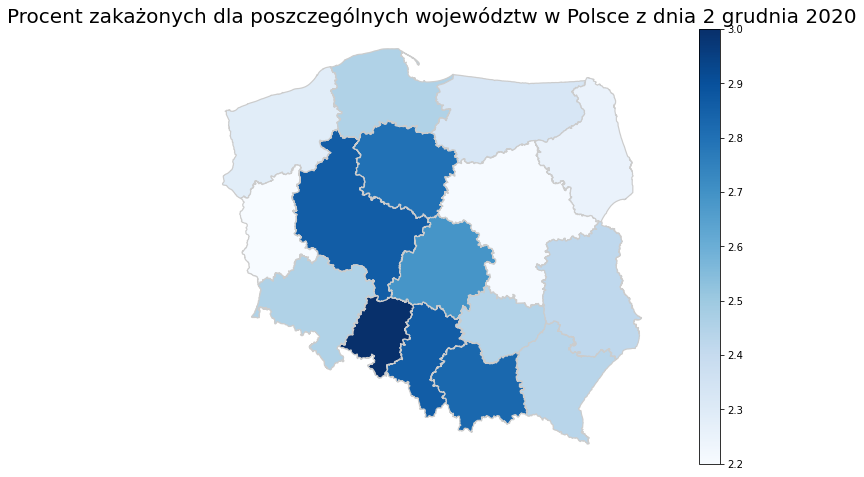

In [102]:
#druga mapka

variable = "Procent zakażonych"
vmin, vmax = 2.2, 3 #to robi skale
#merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
#merged['coords'] = [coords[0] for coords in merged['coords']]

fig, ax = plt.subplots(1, figsize=(13, 8))
merged.plot(column=variable, cmap="Blues", linewidth=1.2, ax=ax, edgecolor="0.8")
ax.axis("off")
ax.set_title("Procent zakażonych dla poszczególnych województw w Polsce z dnia 2 grudnia 2020", fontdict={"fontsize": "20", "fontweight" : "2"})

sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

#for idx, row in merged.iterrows():
#    plt.annotate(s=row['Podpis2'], xy=row['coords'],
#                 horizontalalignment='center', color=row["colors"])

## Uzasadnienie

#### Pierwsza mapka:
* kolory na pryginalnej mapie są ze zbyt wąskiego przedziału i nie przedstawiaja wystarczająco dobrze różnic między wartościami (na przyklad województwa lubelskie i świętokrzystkie są praktycznie tego samego koloru, a różnią się o aż 20 000 zarażeń)
* podpisanie każdego wojewodztwa dokładną ilością zakażeń wpływa negatywnie na estetykę i czytelność wizualizacji. W poprawionym przeze mnie wykresie, dokładne wartości zostały zamienione na przybliżenia do dwóch cyfr znaczących (oznaczenie np. ">22000" oznacza "trochę więcej niz 22 000", uważam, że jest ono intuicyjne i bardziej czytelne)
#### Druga mapka:
* mapa przedstawiająca ilość zakażeń na dane województwo jest w porządku, ale uważam, że bardziej odpowiednia byłaby wizualizacja procentu zakażonych w zależności od ilości mieszkańców w całym województwie. Stworzyłam więc drugą poprawkę (dane o populacji znalazłam na stronie GUS-u, [o tutaj](https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/powierzchnia-i-ludnosc-w-przekroju-terytorialnym-w-2020-roku,7,17.html) ). Uważam że taka wizualizacja jest bardziej przydatna, ułatwia realne porównywanie radzenia sobie poszczególnych województw z wirusem oraz zapobiega wyciąganiu niewłaściwych wniosków